# Verificación

Pretendemos verificar la solución de la siguiente ecuación diferencial estocástica.

$$
\mathrm{d}S_{t}=\alpha\left(t\right)S_{t}\mathrm{d}t+\beta\left(t\right)S_{t}\mathrm{d}W_{t}
$$

Para ello, usaremos el método de Euler-Maruyama 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import brownian_motion as bw

## Método Númerico

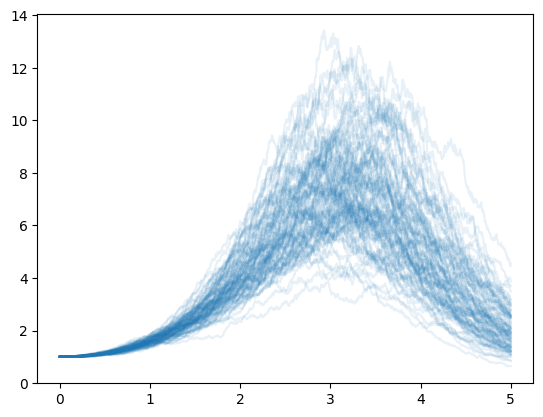

In [12]:
def drift(t, x):
    a = np.sin(t) * x
    return a

def diffusion(t, x):
    b = (t / (1.0 + t)) * x
    return b


sigma = 2 ** (-2)
N = 2 ** 10
T = 5.0
x_0 = 1.0


def get_em_solution(x_0, T, N):
    x_t = np.zeros(N)
    x_t[0] = x_0
    dt = T / N
    t, W = bw.u(T, N)
    for i in np.arange(N - 1):
        w_inc = W[i + 1] - W[i]
        f = drift(t[i], x_t[i])
        g = diffusion(t[i], x_t[i])
        x_t[i + 1] = x_t[i] + f * dt + sigma * g * w_inc
    return t, x_t

fig, ax = plt.subplots()
df = []
for k in np.arange(100):
    t, x_t = get_em_solution(x_0, T, N)
    df.append([t, x_t])
    ax.plot(t, x_t, color="C0", alpha=0.1)
plt.show()

## Metódo Análitico.

Se puede probar que la solución análitica de la ecuación diferencial estocástica.

$$
S_{t}=S_{0}\exp\left(\int_{0}^{t}\left[\alpha\left(s\right)-\dfrac{1}{2}\beta^{2}\left(s\right)\right]\mathrm{d}s+\int_{0}^{t}\beta\left(s\right)\mathrm{d}W\left(s\right)\right)
$$

Entonces, vamos a intentar modelar la solución. 

In [ ]:
s_0 = x_0

def u(t: float, x: float):
    y = drift(t, x) - 0.5 * diffusion(t, x)
    return y

def v(t: float, x: float):
    y = diffusion(t,x)